<a href="https://colab.research.google.com/github/apchavezr/Fundamentos-de-Estad-stica---Ciencia-de-Datos/blob/main/Ejercicio3_IsolationForest_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 3 (versión avanzada): Detección de outliers multivariantes con Isolation Forest en el dataset Iris

Este notebook tiene como objetivo aplicar la técnica de detección de valores atípicos **Isolation Forest** utilizando un conjunto de datos real: el famoso **conjunto Iris**. Este conjunto contiene mediciones de longitud y ancho de sépalos y pétalos para tres especies de flores. Se explorará cómo el modelo puede detectar observaciones que no siguen el patrón general multivariado.

---
## 1. Cargar el conjunto de datos Iris


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_iris

# Cargar datos
iris = load_iris(as_frame=True)
df = iris.frame.copy()
df.columns = [col.replace(" (cm)", "").replace(" ", "_") for col in df.columns]

# Visualizar primeras filas
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


---

## 2. Visualización exploratoria de datos

Se realiza una matriz de dispersión para entender la distribución multivariada del conjunto de datos.


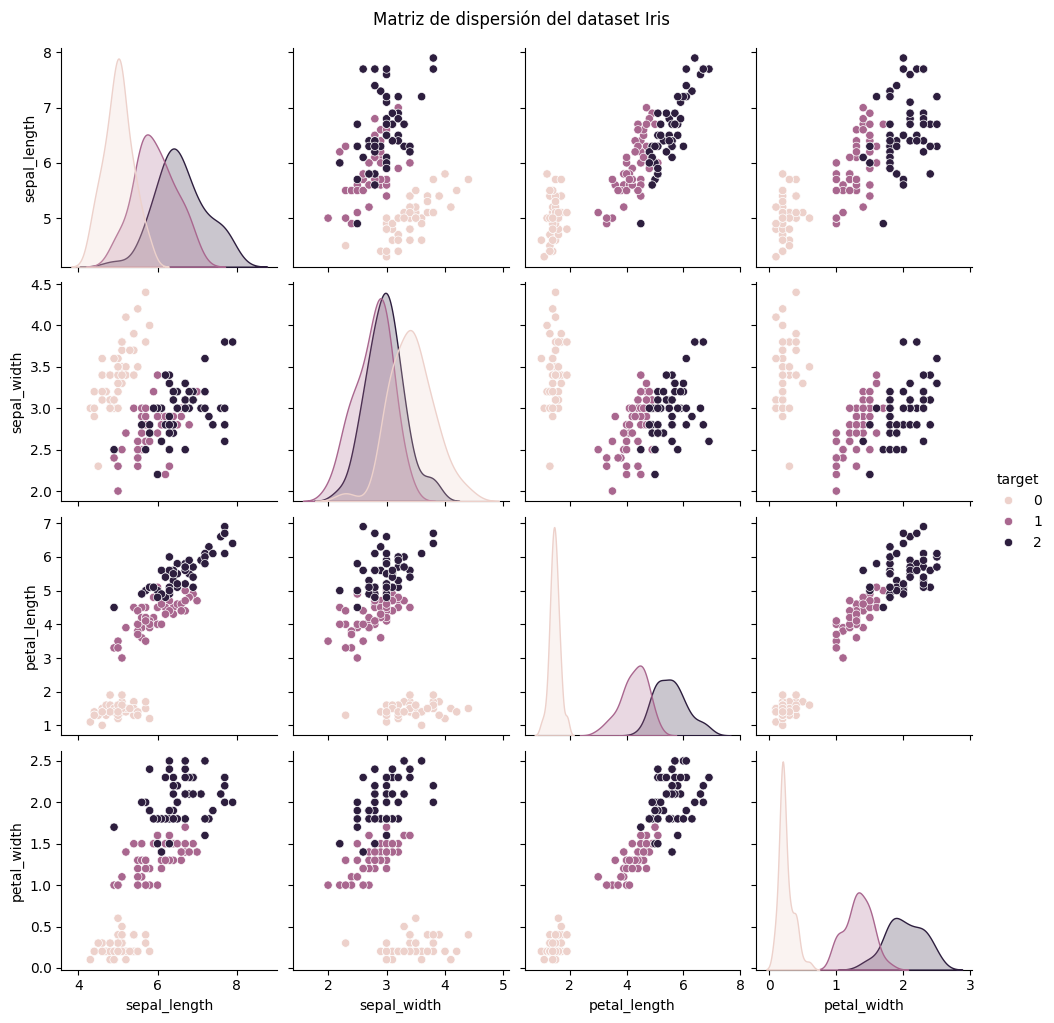

In [2]:
sns.pairplot(df, hue="target", diag_kind="kde")
plt.suptitle("Matriz de dispersión del dataset Iris", y=1.02)
plt.show()

---

## 3. Aplicación del modelo Isolation Forest

El modelo se ajusta a todas las variables numéricas, sin incluir la etiqueta de especie (`target`).


In [3]:
# Aplicar Isolation Forest
X = df.drop(columns=["target"])
model = IsolationForest(contamination=0.05, random_state=42)
df["anomaly"] = model.fit_predict(X)

# Contar observaciones anómalas
df["anomaly"].value_counts()

,count
anomaly,
1,142
-1,8


---

## 4. Visualización de los outliers detectados

Se representa gráficamente cómo el modelo ha identificado los outliers usando dos variables.


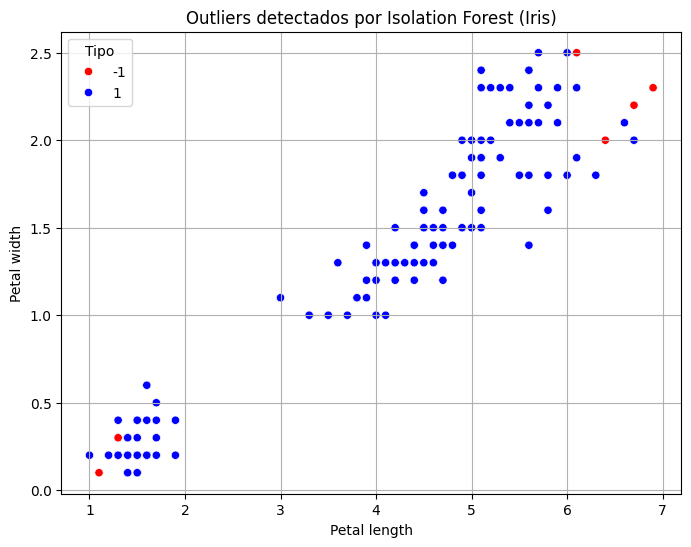

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="anomaly", palette={1: "blue", -1: "red"})
plt.title("Outliers detectados por Isolation Forest (Iris)")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(title="Tipo")
plt.grid(True)
plt.show()

---

## ✅ Conclusión

- El modelo **Isolation Forest** fue capaz de detectar valores atípicos en un conjunto de datos multivariado real.
- Aunque el conjunto Iris no contiene outliers explícitos, algunos registros se comportan de forma diferente respecto al grupo general y son detectados como anomalías.
- Esta técnica es útil para la depuración automática de datos, especialmente cuando no se cuenta con etiquetas para supervisar el proceso.

Se recomienda comparar los resultados con otras técnicas como Local Outlier Factor (LOF) o One-Class SVM para evaluar su consistencia.
